# Reading netCDF files using the netCDF4 library

We start the notebook with the comand "%matplotlib inline" which tells matplotlib to display plots on the notebook itself.

In [5]:
%matplotlib inline

In the cell below we import the libraries that will be used in this notebook. There are currently many ways to read netCDF files in Python. On this notebook we will use the [netCDF4 library](https://unidata.github.io/netcdf4-python/netCDF4/index.html). If you are using Anaconda, you can install this library with:

`$conda install -c anaconda netcdf4`

In [3]:
import numpy as np # numpy does most of the operations involving arrays
import matplotlib.pyplot as plt # matplotlib does graphics
from netCDF4 import Dataset, num2date # netCDF4 handles netCDF files

The line below specifies the path to the netCDF file we want to read. The netCDF4 library can read either from a local directory or from a remote data servers such as [ERDDAP](https://coastwatch.pfeg.noaa.gov/erddap/index.html) and [THREDDS](https://www.unidata.ucar.edu/software/tds/current/). In this example we'll be looking at surface wave data off the Scripps pier from [CDIP's](https://cdip.ucsd.edu/) buoy 201. 

In [1]:
path = "http://thredds.cdip.ucsd.edu/thredds/dodsC/cdip/realtime/201p1_rt.nc"

The function "Dataset" is used to open the netCDF. We specify that we're opening it on reading mode with the option 'r'.

In [4]:
nc = Dataset(path, 'r') 

 Now we have created the object `nc`. Let's check what is on this object:

In [6]:
print(dir(nc))

['Conventions', 'DODS.dimName', 'DODS.strlen', '__class__', '__delattr__', '__dir__', '__doc__', '__enter__', '__eq__', '__exit__', '__format__', '__ge__', '__getattr__', '__getattribute__', '__getitem__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__ne__', '__new__', '__orthogonal_indexing__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__unicode__', '_close', '_enddef', '_grpid', '_isopen', '_redef', 'acknowledgment', 'cdip_station_id', 'cdm_data_type', 'close', 'cmptypes', 'comment', 'contributor_name', 'contributor_role', 'createCompoundType', 'createDimension', 'createEnumType', 'createGroup', 'createVLType', 'createVariable', 'creator_email', 'creator_name', 'creator_url', 'data_model', 'date_created', 'date_issued', 'date_modified', 'delncattr', 'dimensions', 'disk_format', 'enumtypes', 'featureType', 'file_format', 'filepath', 'geospatial_lat_max', 'geospatial_lat_min', 'geospatial_lat_

We note that, among other things, the object nc has "variables". Now let'see what is on `variables` 

In [11]:
print(dir(nc.variables))

['_OrderedDict__map', '_OrderedDict__marker', '_OrderedDict__root', '_OrderedDict__update', '__class__', '__cmp__', '__contains__', '__delattr__', '__delitem__', '__dict__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getitem__', '__gt__', '__hash__', '__init__', '__iter__', '__le__', '__len__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__reversed__', '__setattr__', '__setitem__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', 'clear', 'copy', 'fromkeys', 'get', 'has_key', 'items', 'iteritems', 'iterkeys', 'itervalues', 'keys', 'pop', 'popitem', 'setdefault', 'update', 'values', 'viewitems', 'viewkeys', 'viewvalues']


We can also check the type of `nc.variables` by typing:

In [7]:
print(type(nc.variables))

<class 'collections.OrderedDict'>


So, nc.variables is a dictionary. Let's check its keys.

In [9]:
print(nc.variables.keys())

odict_keys(['sourceFilename', 'waveTime', 'waveTimeBounds', 'waveFlagPrimary', 'waveFlagSecondary', 'waveHs', 'waveTp', 'waveTa', 'waveDp', 'wavePeakPSD', 'waveTz', 'waveSourceIndex', 'waveFrequency', 'waveFrequencyBounds', 'waveFrequencyFlagPrimary', 'waveFrequencyFlagSecondary', 'waveBandwidth', 'sstTime', 'sstTimeBounds', 'sstFlagPrimary', 'sstFlagSecondary', 'sstSeaSurfaceTemperature', 'sstSourceIndex', 'sstReferenceTemp', 'gpsTime', 'gpsTimeBounds', 'gpsStatusFlags', 'gpsLatitude', 'gpsLongitude', 'gpsSourceIndex', 'dwrTime', 'dwrTimeBounds', 'dwrSourceIndex', 'dwrBatteryLevel', 'dwrZAccelerometerOffset', 'dwrXAccelerometerOffset', 'dwrYAccelerometerOffset', 'dwrOrientation', 'dwrInclination', 'dwrBatteryWeeksOfLife', 'cat4Time', 'cat4TimeBounds', 'cat4FlagPrimary', 'cat4FlagSecondary', 'cat4AirTemperature', 'cat4SourceIndex', 'cat4StatusFlags', 'cat4WhiteTemperature', 'cat4BlackTemperature', 'cat4MetalTemperature', 'cat4GroovedTemperature', 'metaStationName', 'metaPlatform', 'met

This tell us that this netCDF file has the variables waveTime, waveHs, metaDeployLatitude... etc. We may wonder what waveHs is. The beauty of the netCDF format is that it stores all the information for us as metadata, and if done properly, there should be all the information needed to understand the data. As an example, let's check `nc.variables['waveHs']`

In [11]:
print(dir(nc.variables['waveHs']))

['_FillValue', '__array__', '__class__', '__delattr__', '__delitem__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattr__', '__getattribute__', '__getitem__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__len__', '__lt__', '__ne__', '__new__', '__orthogonal_indexing__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__setitem__', '__sizeof__', '__str__', '__subclasshook__', '__unicode__', '_assign_vlen', '_check_safecast', '_cmptype', '_enumtype', '_get', '_getdims', '_getname', '_grp', '_grpid', '_has_lsd', '_iscompound', '_isenum', '_isprimitive', '_isvlen', '_name', '_no_get_vars', '_nunlimdim', '_put', '_toma', '_varid', '_vltype', 'always_mask', 'ancillary_variables', 'assignValue', 'chartostring', 'chunking', 'coordinates', 'datatype', 'delncattr', 'dimensions', 'dtype', 'endian', 'filters', 'getValue', 'get_dims', 'get_var_chunk_cache', 'getncattr', 'grid_mapping', 'group', 'long_name', 'mask', 'name', 'ncattrs', 'ncei_name', '

We can check the attributes of a given variable, by:

In [12]:
print(nc.variables['waveHs'].ncattrs())

['long_name', 'units', '_FillValue', 'standard_name', 'coordinates', 'grid_mapping', 'valid_min', 'valid_max', 'ancillary_variables', 'ncei_name']


Now lets loop trhough all the attributes

In [13]:
for at in nc.variables['waveHs'].ncattrs():
    print("%s : %s" %(at, nc.variables['waveHs'].getncattr(at)))

long_name : significant wave height
units : meter
_FillValue : -999.99
standard_name : sea_surface_wave_significant_height
coordinates : metaDeployLatitude metaDeployLongitude
grid_mapping : metaGridMapping
valid_min : 0.0
valid_max : 20.0
ancillary_variables : waveFlagPrimary waveFlagSecondary
ncei_name : WAVE HEIGHT - SIGNIFICANT


We can also check the dimensions of a given variable

In [15]:
print(nc.variables['waveHs'].dimensions)

('waveTime',)


One important thing to note when dealing with netCDFs is the way to handle time. In order optimize the storage, time is usually saved as an integer relative to a given reference date (e.g. "days since 1900-01-01", or "hours since 1987-01-01 00:00:0.0). Let's see how to convert the netCDF time to a more meaningful time.

In [18]:
print(nc.variables['waveTime'][:])

[1543950225 1543952025 1543953825 ... 1568257335 1568259135 1568260935]


In [19]:
print(nc.variables['waveTime'].ncattrs())

['long_name', 'standard_name', 'units', 'calendar', 'axis', 'bounds', 'comment']


So, the variable "time" has an attribute called "units", that shows the reference time for this file. In this case "hours since 1918-05-01"

In [20]:
print(nc.variables['waveTime'].units)

seconds since 1970-01-01 00:00:00 UTC


We can use the function `num2date` to convert the values on `nc.variables['time'][:]`, to actual time using its given units. In this way, we don't have to worry reference time, about leap years, or timestep.

In [21]:
time = num2date(nc.variables['waveTime'][:], nc.variables['waveTime'].units)

In [24]:
print(time)

[datetime.datetime(2018, 12, 4, 19, 3, 45)
 datetime.datetime(2018, 12, 4, 19, 33, 45)
 datetime.datetime(2018, 12, 4, 20, 3, 45) ...
 datetime.datetime(2019, 9, 12, 3, 2, 15)
 datetime.datetime(2019, 9, 12, 3, 32, 15)
 datetime.datetime(2019, 9, 12, 4, 2, 15)]


Now lets read the significant wave height. And check its shape.

In [25]:
swh = nc.variables['waveHs'][:]

In [26]:
print(time.shape)
print(swh.shape)

(13375,)
(13375,)


Finally, let's plot the significant wave height as a function of time

Text(0.5, 1.0, 'Significan Wave Height')

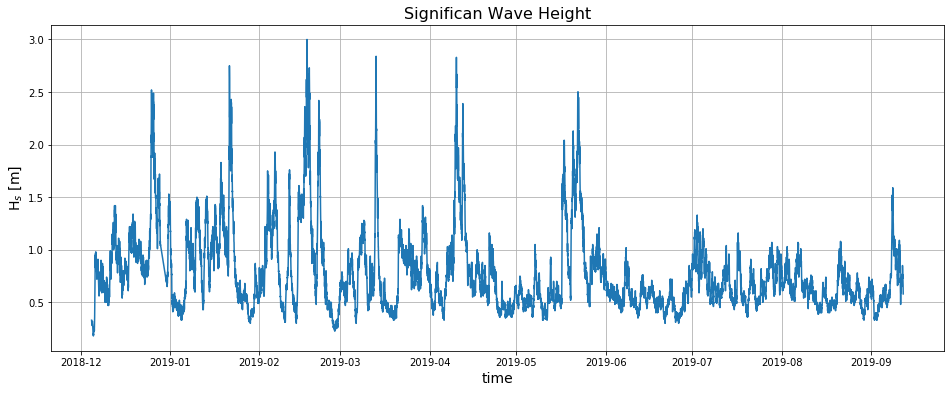

In [32]:
plt.figure(figsize=(16,6)) # this creates a figure
plt.plot(time, swh) # this is the comand to plots x=t and y=swh
plt.ylabel('H$_s$ [m]', fontsize=14) 
plt.xlabel('time', fontsize=14)
plt.grid('dotted')
plt.title('Significan Wave Height', fontsize=16) # sets the plot title